In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train_na_filled.csv')
test = pd.read_csv(filepath_home+'test_na_filled.csv')

In [3]:
# 마키아 스코어 계산
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]
train[total_negative_cols] = 6-train[total_negative_cols]
train['mach_score'] = train.apply(lambda x:x.iloc[0:40:2].mean(),axis=1)

In [4]:
# tipi 성격 구분 5 칼럼 추가
train[['tp02','tp04','tp06','tp08','tp10']]= 6-train[['tp02','tp04','tp06','tp08','tp10']]

train['Extraversion']=(train.tp01+train.tp06)/2
train['Agreeableness']=(train.tp02+train.tp07)/2
train['Conscientiousness']=(train.tp03+train.tp08)/2
train['Emotional Stability']=(train.tp04+train.tp09)/2
train['Openness to Experiences']=(train.tp05+train.tp10)/2

In [5]:
# 각 답변 시간을 빠르다/느리다 로 이분화 후 전체 설문의 답변시간을 0~20 사이로 수치화
total_median = np.median(np.ravel(train.iloc[:,1:40:2]))
train.iloc[:,1:40:2] = np.where(train.iloc[:,1:40:2]>total_median,1,0)
train['Q_total_E'] = train.iloc[:,1:40:2].sum(axis=1) # 0~20

# 손잡이와 교육 수준과의 관계

In [6]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [7]:
figpath='C:/Users/이동재/Desktop/그림/'

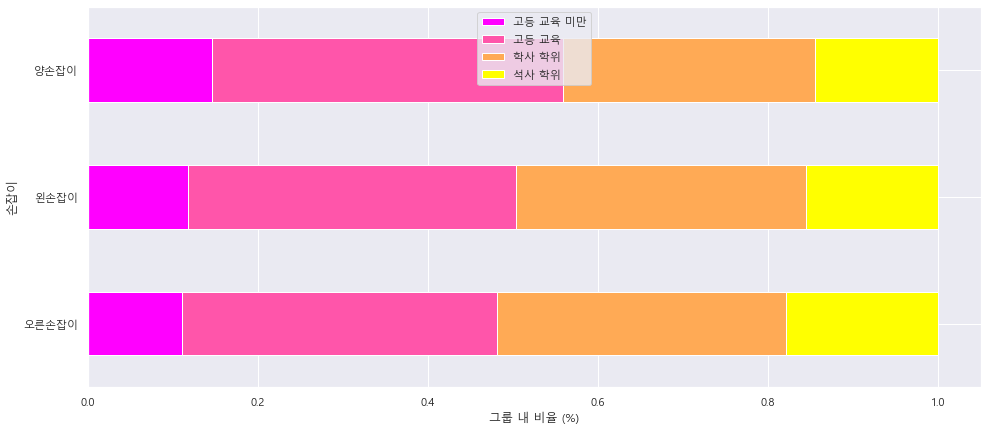

In [8]:
fig ,ax = plt.subplots(figsize=(10,6))
train.groupby(['hand'])['education'].value_counts(normalize=True).unstack().plot(kind='barh',
                                                                                stacked=True,
                                                                                figsize=(16,7),
                                                                                ax=ax,
                                                                                colormap='spring')
ax.set_yticklabels(['오른손잡이','왼손잡이','양손잡이'])
ax.set_xlabel('그룹 내 비율 (%)')
ax.set_ylabel('손잡이')
ax.legend(['고등 교육 미만','고등 교육','학사 학위','석사 학위'],loc=9)

fig.savefig(figpath+'hand_edu.png',dpi=fig.dpi)

- 오른손->왼손->양손잡이로 갈수록 교육 수준의 중심이 낮은쪽으로 이동하는 것을 확인할 수 있다.

# 2. 손잡이와 답변시간 (성별)사이의 관계

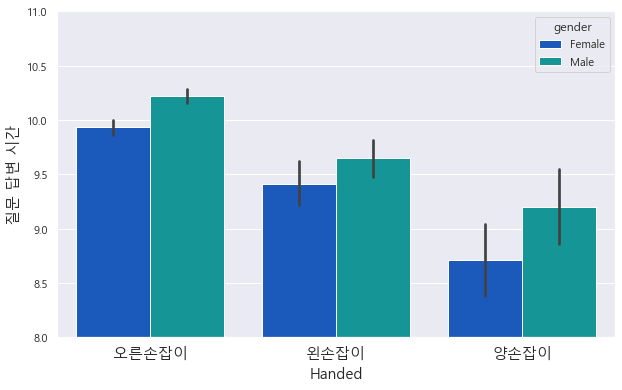

In [9]:
fig ,ax = plt.subplots(figsize=(10,6))
ax.set_ylim(8,11)
sns.barplot(data=train,x='hand',y='Q_total_E',palette='winter',hue='gender',ax=ax)
ax.set_xticklabels(['오른손잡이','왼손잡이','양손잡이'],fontsize=15)
ax.set_xlabel('Handed',fontsize=15) 
ax.set_ylabel('질문 답변 시간',fontsize=15)
#ax.legend(['Female','Male'],['여성','남성'],loc=9)
#ax.set_yticklabels('8.0 8.5 9.0 ')
fig.savefig(figpath+'gender_answerT.png',dpi=fig.dpi,transparent=True)

# Todo
- 4번 poc : 클러스터링 (노용철)
- 심화 poc -> 정리된 세부 주제에서 하나 더 깊이 들어가서 분석할 수 있는 내용
- Preprocessing : scaling, labeling , encoding , feature-adding
- ML : auto -ML 패키지 이용 가능하면 좋고
- 발표 / 제출 자료 작성 시작
- 발표자 + 대본

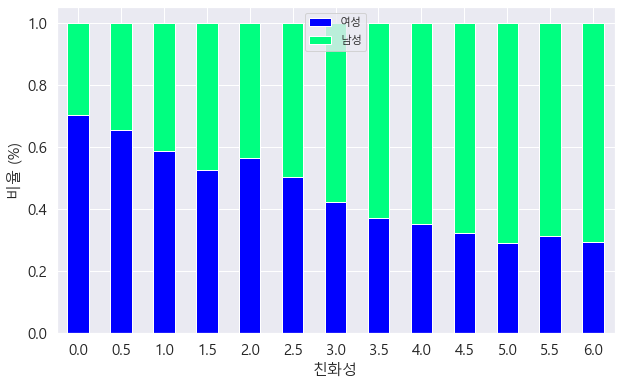

In [10]:
Agreeableness_gender=train.groupby(['Agreeableness'])['gender'].value_counts(normalize=True).unstack()
Agreeableness_gender.plot(kind='bar', stacked=True, figsize=[10,6], colormap='winter',rot=0)
fig,ax = plt.gcf(),plt.gca()
ax.set_xlim((0.5,13.5))
ax.legend(['여성','남성'],loc=9)
ax.set_xlabel('친화성',fontsize=15)
ax.set_ylabel('비율 (%)',fontsize=15)
ax.set_xticklabels('3 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0'.split(),fontsize=15)
ax.set_yticklabels('0.0 0.2 0.4 0.6 0.8 1.0'.split(),fontsize=15)
fig.savefig(figpath+'gender_agree.png',dpi=fig.dpi,transparent=True)

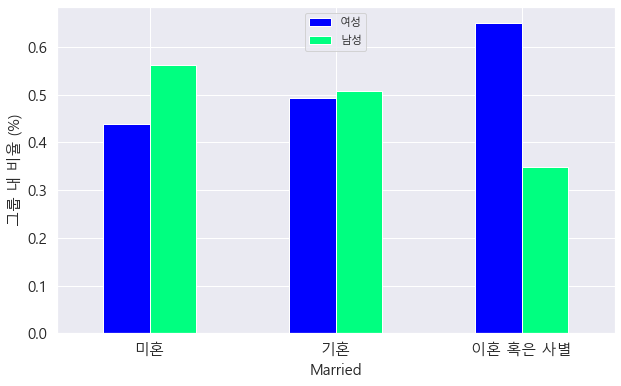

In [11]:
married_gender=train.groupby(['married'])['gender'].value_counts(normalize=True).unstack()
married_gender.plot(kind='bar', figsize=[10,6], colormap='winter',rot=0)
fig,ax = plt.gcf(),plt.gca()
ax.legend(['여성','남성'],loc=9)
ax.set_xticklabels(['미혼','기혼','이혼 혹은 사별'],fontsize=15)
ax.set_yticklabels('0.0 0.1 0.2 0.3 0.4 0.5 0.6'.split(),fontsize=15)
ax.set_xlabel('Married',fontsize=15)
ax.set_ylabel('그룹 내 비율 (%)',fontsize=15)
fig.savefig(figpath+'married_gender.png',dpi=fig.dpi)

(0.5, 13.5)

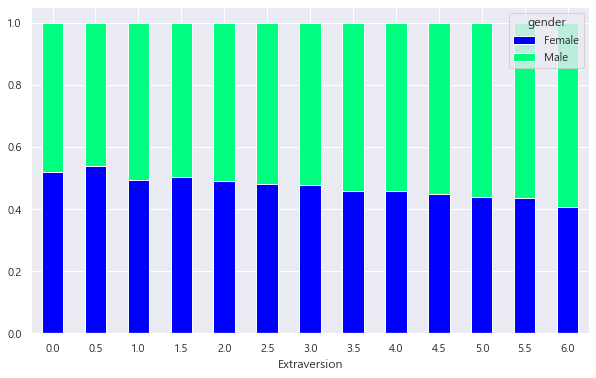

In [12]:
# tp 점수 
extraversion_gender=train.groupby(['Extraversion'])['gender'].value_counts(normalize=True).unstack()
extraversion_gender.plot(kind='bar', stacked=True, figsize=[10,6], colormap='winter',rot=0)
fig,ax = plt.gcf(),plt.gca()
ax.set_xlim((0.5,13.5))

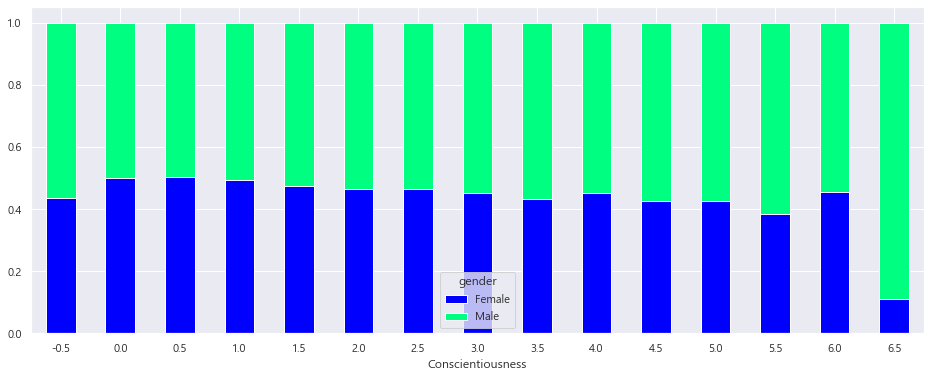

In [13]:
Conscientiousness_gender=train.groupby(['Conscientiousness'])['gender'].value_counts(normalize=True).unstack()
Conscientiousness_gender.plot(kind='bar', stacked=True, figsize=[16,6], colormap='winter',rot=0)